# CS51 Assignment 2: Algorithms and Simulation


This assignment has two distinct parts in addition to a reflection: Part 1 requires you to apply your knowledge of algorithmic thinking and optimization and Part 2 allows you to demonstrate your modeling and coding skills by writing a numerical simulation. Material relevant for Part 1 will be covered in class during weeks 3-5, while material relevant for Part 2 will be covered in class during weeks 7 and 8. 


You'll notice several "*Optional Challenge*" problems throughout the assignment to challenge yourself. These will only be scored (4 or 5) if they are completed correctly with thorough explanation. If you attempt an optional challenge but do not succeed, you will not be penalized with a low score. Remember that you must include an explanation and interpretation for optional problems to be scored.


*This is an individual assignment. We will be checking for similarities among submissions and will take plagiarism seriously*.


**You must complete all tasks within this pre-formatted Jupyter notebook. Please follow ALL formatting guidelines and the HC Guidelines in the assignment instructions on Forum (near the top and bottom of the instructions respectively).**

## **PART 1: OPTIMIZATION**

For this section of the assignment, you will select one of the scenarios below and apply #optimization. You must complete all sections. [#optimization, potentially relevant: #modeling, #algorithms, #variables, #utility, #constraints]

1. *Scenario 1*: To prevent the spread of an infectious disease, a vaccine needs to be distributed as quickly and efficiently as possible to the 15 cities that have had major outbreaks. How can you optimize the route between the cities? For this scenario, you should select cities that are relevant to the disease that you will choose for PART 2 and include a map of these cities (you may use an existing map or draw your own). 


2. *Scenario 2*: Suppose that a new virus is starting to spread, and many clinics do not have sophisticated diagnostic tools and must be able to determine whether or not a patient has this dangerous virus based solely on easily measured symptoms. You have been collecting information on symptoms (temperature, WBC count, headache severity, and cough severity) and you need to determine which patients have this new disease and which have only a milder illness. Plots that provide an overview of the data are available [here](https://drive.google.com/file/d/1td_jCTzYiOCMPJ8CwVSJU7u-pQ-5R1JW/view?usp=sharing). The data can be accessed at [this link](https://drive.google.com/file/d/1smz8OhVkIAbWVKpmkx7liE3bOWLfQch7/view?usp=sharing) (1 = Infected, 0 = Not infected).

#### 1.1 Optimization Problem: 
Describe the optimization problem for your scenario: what is the objective function? What are the decision variables? Are there any constraints? Clearly articulate each component so that it’s clear how the objective function would be measured and how the decision variables would impact it (~200 words). 


<font color='red'>**Answer 1.1 here**</font><br/>
==> Optimization means we are choosing inputs that give us the best possible outcome. According to scenario 2, I need to determine the patients have this new disease AND have only a milder illness. The best possible outcome of this scenario is distinguishing most of the patients accurately. Therefore, the objective function of this problem is the training accuracy of the determination. Through this, one can expect a good testing accuracy. Decision variables are Temperature, WBC Count, Headache Severity, Cough Severity - the values that the optimizer can change. These variables help us to understand how to divide the samples into subgroups based on the standards. In the flow chart, these decision variables are used to classify the data. The training accuracy is a fraction of the correctly classified samples over the number of whole samples. The decision variables should have standards that maximize the training accuracy.

There are no pre-determined constraints; however, to optimize the testing accuracy, I set constraints here. Suppose there's no limitation for the decision tree, with different groups of samples overlap each other a lot. Constraints, for example, original sample size, subgroup sample size, the depth of the tree, and the number of subgroups, help avoid this.

--202 words.

#### 1.2 Optimization Technique: 

What process can be used to find the optimal solution in your scenario? Identify and describe an existing algorithm that could be used to complete this process, including the inputs, outputs, and required steps. Explain the advantages and limitations of this algorithm. In your explanation, you should address whether your algorithm would lead to the global optimum and you may wish to compare your algorithm with other possible optimization techniques. (~200 words)

- *Optional*: Draw a flowchart to illustrate the process. 

- *Optional*: Create a program in python to implement this optimization process.


<font color='red'>**Answer 1.2 here**</font><br/>
==> One can use the decision tree here as it's widely used, and our dataset helps us to proceed with a greedy algorithm. A greedy algorithm is useful when one knows the answer to the problem to train the model. As non-parametric, the whole dataset can be randomly split into two: a training set and a testing set. A model will use a training set to train and build the model to provide testing accuracy. Setting the split standard to check a testing value is above/below a particular value; this is a binary decision: yes or no.

At each depth, the algorithm should detect the dimension that mostly satisfies the fairness of splitting. As mentioned in 1.1, this algorithm has constraints to avoid over-fitting. Therefore, this algorithm repeats until it reaches the constraints, and the decisions made at the end of the tree become testing results.

One possible drawback of the greedy algorithm is that it does not guarantee the best way to do it as it only looks up the local value. It means, where one starts the algorithm matters for the testing accuracy.

Brute force and kNN algorithms are not a good fit here since Brute force uses much computing power, making the big-O high, and kNN works poorly when there are multiple variables to analyze while we have more than two decision variables.

-- 225 words

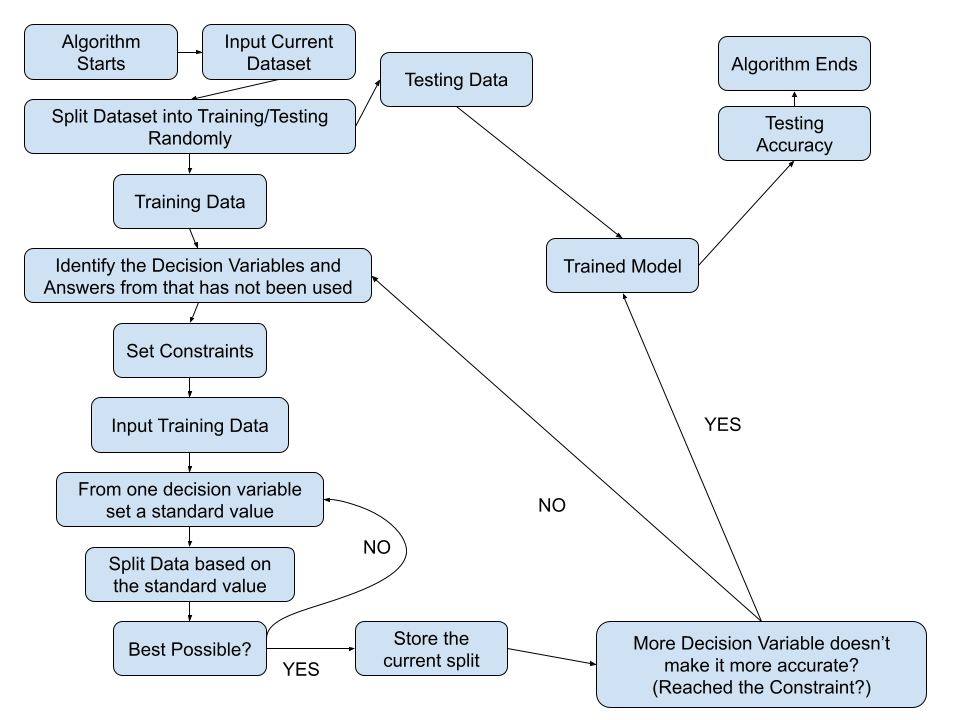

In [1]:
from IPython.display import Image
Image("CS51 Flow Chart.png")

#this code shows the image in Jupyter Notebook.

In [2]:
import pandas as pd
df = pd.read_csv('CS51_Assignment_Diagnosis_Data.csv') #reads the .csv in the folder
df #checks whether the data is successfully imported.

,Infected,Temperature,WBC Count,Headache Severity,Cough Severity
0,0,38.36,12170.76,4.99,5.39
1,0,35.99,11684.54,3.05,2.95
2,0,35.71,8256.36,2.83,2.63
3,0,35.91,5322.54,3.98,1.48
4,0,34.81,7979.27,5.16,3.92
...,...,...,...,...,...
95,1,37.29,12630.87,4.30,7.17
96,1,38.96,10229.35,4.53,7.76
97,1,37.78,9714.87,5.15,7.19
98,1,37.83,8912.79,9.08,6.20


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# split data into training and testing arrays
all_inputs = df[['Temperature', 'WBC Count', 'Headache Severity', 'Cough Severity']].values
all_classes = df[ 'Infected'].values
(train_inputs, test_inputs, train_classes, test_classes) = train_test_split(all_inputs, all_classes, train_size=0.7, test_size=0.3,random_state=1)

# grow a tree!!!
depth = 4 # <----- try different depths between 2 and 10
dtc = DecisionTreeClassifier(max_depth=depth)
dtc.fit(train_inputs, train_classes)
print("Training Accuracy score:",dtc.score(train_inputs, train_classes))
print("Test Accuracy score:",dtc.score(test_inputs, test_classes))

#Different Training Accuracy Scores from tree depth 2 to 10:
#2 .957 
#3 .985
#4 1.0 
#5 1.0
#6 1.0
#7 1.0
#8 1.0
#9 1.0
#10 1.0

#For the Tree Depth 4, the training accuracy achieved 1.0. Further depths also provdie 1.0; however, I set the depth as 4 to avoid over-fitting.


#the code above was provided in CS51 Session 5.2 Spring 2021 at Minerva Schools at KGI.

#in order to import the libraries and to understand, I refered the following link
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

Training Accuracy score: 1.0
Test Accuracy score: 0.9666666666666667


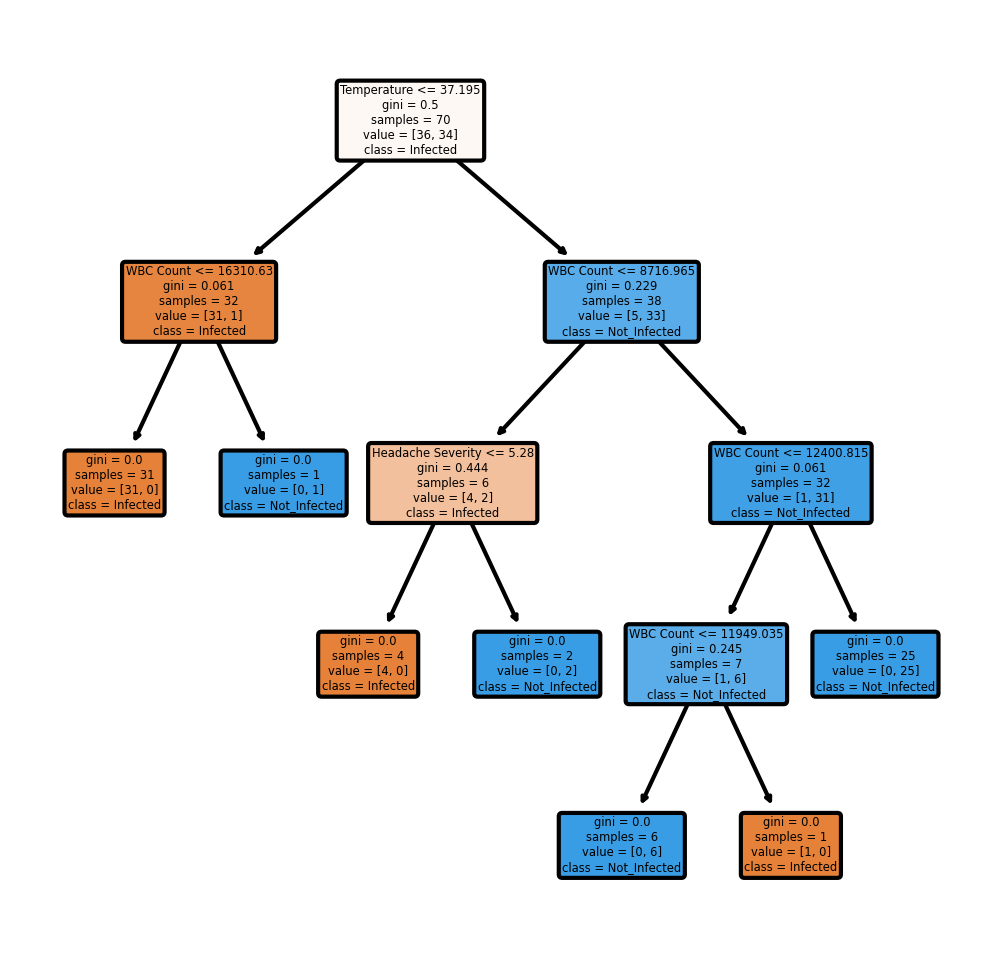

In [4]:
import matplotlib.pyplot as plt
from sklearn import tree
feature_n=['Temperature', 'WBC Count', 'Headache Severity', 'Cough Severity']
target_n=['Infected', 'Not_Infected']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtc,
               feature_names = feature_n, 
               class_names=target_n,
               filled = True,
                rounded = True);
fig.savefig('imagename.png')


# The Code above was adapted from: https://gist.githubusercontent.com/Nikhil-Adithyan/1f5e027d56c6523fe6bc30cde3cec97f/raw/7e71f503dc3446b56a41a07ee6f3fd79fae4aa49/tree_viz.py
# The analyzation of the code is based on the concepts that explained at: 

## **PART 2: SIMULATION**

The SIR model of the spread of disease is commonly used to help understand how a disease might move through a population. You were introduced to this with the NetLogo agent-based model in NS50 and will review it again in Week 7 of CS51. Check out the class readings to learn about this model.


For this assignment, you will select one disease of your choice to model. Please choose a disease from [THIS LIST](https://docs.google.com/spreadsheets/d/1_p_6W8Zh07XFwuQ3EzkT7PEdbtwTzejHbpKm_wBOLas/edit?usp=sharing) to investigate.  If you would like to select your own disease to model, you may email your professor with the disease and parameter descriptions for approval. You must select an infectious disease (one that is transmitted from person to person through a viral, bacterial, or parasitic agent), not a genetic or environmental disease. 

### **Part 2.1 Numerical Modeling and Simulation**

For this part of the assignment, you’ll consider the SIR model described by the set of differential equations below, and the numerical simulation in Python via Euler’s method.

$$ \frac{dS}{dt} = -\frac{b}{N}S(t) I(t) $$
<br>
$$ \frac{dI}{dt} = \frac{b}{N}S(t)I(t) - kI(t) $$
<br>
$$ \frac{dR}{dt} = k I(t) $$
<br>

#### 2.1.1 Variables and Parameters (~250 words) [#variables] 

This section serves to set up an initial analysis of the SIR model. 
1. State the disease you selected to model.
2. Identify the relevant **variables** of the model, classify what type of variables they are, and explain what they mean in the context of your model. 
3. Explain what the relevant **parameters** ($b$ and $k$) are and how to select appropriate values for them, including the initial values. You’re encouraged to use empirical data if possible to justify these values. You may also complete a well-reasoned #estimation for any values that are difficult to justify with empirical data. Include APA citations for any external sources used. Note that you can work with population values $S$, $I$, $R$, or proportions, $S/N$, $I/N$, $R/N$, as long as you are consistent.
4. Explain what it would mean for the parameters ($b$ and $k$) to be smaller or larger. Consider what real-world factors would reduce or increase these parameters.
5. *Optional*: Modify the basic SIR model to add a layer of real-world complexity. A few ideas are listed below. Explain the key features of the extended model, including the modified differential equations and a full description and classification of any new variables and parameters following the steps above.
  - Vaccination
  - Antibiotic use and/or development of antibiotic resistance
  - Variability in population susceptibility (e.g. children and the elderly have different rates of infection compared to young adults).
  - Birth and death rates in the population

<font color='red'>**Answer 2.1.1 here**</font><br/>
==> The COVID-19 SIR model has four variables: S(t), I(t), R(t), and t. As SIR is represented in t, t is an independent variable while the rest are dependent variables. SIR each respectively means the number of suspects, infects and removed. Since the time is in days and SIR is in the number of people, they are all discrete quantitative variables.

There are two parameters: b and k -- the rate of infection and recovery, respectively. These variables affect the simulation; however, they are not independent variables because once they are appropriately chosen, they will be fixed throughout the simulation.

This SIR model is based on S.Korea data from February 2020 to June 2020, when S.Korea had rapid growth cases. By March 2021, S.Korea is doing much better than the first wave; however, this SIR model will simulate if South Korea was not serious after the first wave and predict until February 2022. The reasonable b and k values are 0.400 and 0.035 (Cooper et al. 2020). With social distancing and mandatory mask policies, people can reduce b. Continuous development of effective treatments and mutation in viruses can increase k since R represents removal: either get cured or die from the virus.

However, in real-world settings, when an individual is recovered from COVID-19, they are not entirely safe from COVID-19. Some of them got infected a few times again. Cooper et al. see this problem because R(t) is not reaching 1 in a short simulation. They assumed t goes to infinity when R(t) converges to 1. Another parameter, p, can be used to determine whether an individual will get COVID-19 once again since the reinfection rate is lower than 0.01 (Ledford, 2021). One can set p as lower than 0.01 and use this value to bring some of R(t) back to S(t).


-- 290 words<br/>
-- References<br/>
Cooper, I., Mondal, A., & Antonopoulos, C. G. (2020). A SIR model assumption for the spread of COVID-19 in different communities. Chaos, Solitons & Fractals, 139, 110057. https://doi.org/10.1016/j.chaos.2020.110057<br/>
Ledford, H. (2021). COVID reinfections are unusual — but could still help the virus to spread. Nature. https://www.nature.com/articles/d41586-021-00071-6?error=cookies_not_supported&code=d2d068d5-a596-4544-80ac-064d77913c69

#### 2.1.2 Euler’s Method Description (~150 words) [#algorithms]

Explain what it means to solve the SIR differential equations and how Euler’s method works as an algorithm to achieve a numerical solution via simulation. In your explanation, identify whether the model and simulation are continuous or discrete, and consider the role of the step size (`h`) in the algorithm.

<font color='red'>**Answer 2.1.2 here**</font><br/>
Euler's method predicts the graph based on the initial points and initial slope. In each step, Euler's method puts the values back into the equation and results in the next point and slope, and so on. In this problem, with SIR differential equations, one can draw a graph.

For example, one should identify all dependent and independent variables. After, one should define the step size to move on to the next step. Each step, different delta value results. While the independent variable keeps adding up the step size, dependent variables keep adding the delta values. One thing to note about Euler's method is step size is significant to the accuracy of the prediction. If the step size is huge, the prediction skips as many calculations as between two steps. To skip fewer calculations, one should use a smaller step size to get good accuracy. In this case, there are more calculations to do, so the python might show the result slower.

The SIR model is continuous in theory; however, Euler's method discretely draws this as a step size makes the method discrete.<br/>

-- 180 words

#### 2.1.3 Euler’s Method Implementation [#algorithms, #dataviz]

Implement a numerical simulation to derive the implications of your model using Euler’s method in Python.Your simulation must generate at least one relevant visualization of the disease dynamics, including a descriptive figure legend and caption. You may need to adjust the run-time and step size in your simulation to ensure the visualization is maximally informative. Include thorough comments in your code to convey your understanding of the implementation of Euler’s method. 

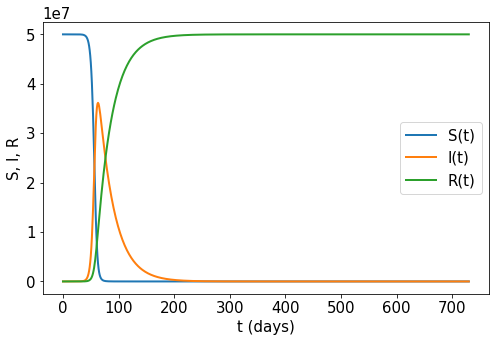

Figure 1. The SIR Modeling that shows the prediction to Feb 2022 based on Feb 2020


In [5]:
import numpy as np

t0 = 0 #initial time
t_end = 730 #two years after February 2020, February 2022.

h = 1 #step size 
steps = int((t_end - t0)/h + 1) # number of steps

# variables:
t = np.linspace(t0, t_end, steps) # storing t values
S = np.zeros(steps) # storing S values
I = np.zeros(steps) # storing I values
R = np.zeros(steps) # storing I values

# parameters:
b = 0.400 #infection rate 
k = 0.035 #recovery rate

def dSdt(t,S,I):
    # dS/dt
    return -b*S*I/N

def dIdt(t,S,I):
    # dI/dt
    return (b*S/N-k)*I

def dRdt(t,S,I):
    return k*I
    # dR/dt
    
# initial conditions:
S[0] = 50000000 #2019 South Korean Population as rounded up to nearest tens of millions.
                #Even though the simulation starts from 2020, the most trustworthy census data is 2019. This is a potential limitation of this simulation.
                #Statistics Korea. (2020). Statistics Korea. http://kostat.go.kr/portal/eng/pressReleases/8/7/index.board?bmode=read&bSeq=&aSeq=386088&pageNo=1&rowNum=10&navCount=10&currPg=&searchInfo=&sTarget=title&sTxt=
I[0] = 1 #Starts with one infection
R[0] = 0
N = S[0] + I[0]

for n in range(steps-1): # range(start, stop, step), This part is a calculation of Euler's method.
    S[n+1] = S[n] + h*dSdt(t[n], S[n], I[n])
    I[n+1] = I[n] + h*dIdt(t[n], S[n], I[n])
    R[n+1] = R[n] + h*dRdt(t[n], S[n], I[n])

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = [8,5]
plt.plot(t,S,linewidth=2,label='S(t)')
plt.plot(t,I,linewidth=2,label='I(t)')
plt.plot(t,R,linewidth=2,label='R(t)')
plt.xlabel('t (days)')
plt.ylabel('S, I, R')
plt.legend(loc='best')
plt.show()
print("Figure 1. The SIR Modeling that shows the prediction to Feb 2022 based on Feb 2020")
#the code above was provided in CS51 Session 7.2 Spring 2021 at Minerva Schools at KGI.

#### 2.1.4 Results and Interpretation (~250 words) [#modeling, #dataviz]

- Interpret the results of the numerical simulation by making reference the output in the visualization(s). To fully interpret the results, you should run the simulation multiple times with varying parameter inputs (b and k) and observe the behavior of your model. Does the behavior align with what you would expect these adjustments to have in reality (given your answer to 1.4 above)?  

- Explain how useful this model is by considering the following guiding questions: What insights can be gained? How closely do the results match what you’d expect in reality? What are the most notable assumptions of this model and what impact do they have on its usefulness?


<font color='red'>**Answer 2.1.4 here**</font><br/>

An increase in b gives faster infection, and a decrease will give vice versa. An increase in k will lower the peak of I(t), and decrease in k will do vice versa.

After changing b and k, I observed the following. Changes in b make the infection slower/faster; however, at the same time, based on the infection speed, the maximum of I(t) changes too. The faster infection gives the higher maximum point of I(t), and the slower infection gives vice versa. The higher k value makes people recover fast and ends the spread of the virus quite quickly. However, the smaller k value makes people stay infected and makes the spread of the virus rapidly. It is a reasonable observation since if more people get infected, people have a higher probability of contact with the infected group. Also, if people get recovered quickly, it reduces the risk of spreading the virus; therefore, it lowers the possibility of contact with the infects.
 
However, there are some limitations of this simulation. There are travelers from outside of the country in the real world. Not everyone follows the COVID protocols, and the population continuously changes as more people are born and die. Despite these limitations, the SIR model is still helpful to investigate how COVID-19 can quickly spread. Governments of the world continuously develop new policies to respond to COVID-19, and each policy works differently. Based on the guidelines, b value can change, and it will allow people to estimate how much the policy is effective. Also, newly developed treatments will increase the k value -- people can estimate when will be safe enough from COVID-19.

--273 words

### **Part 2.2 Agent-Based Modeling and Simulation**

For this part of the assignment, you’ll consider an agent-based model to describe the spread of disease and an agent-based simulation implemented in [NetLogo](http://ccl.northwestern.edu/netlogo/models/Virus). Explore the model thoroughly and run it multiple times with different parameter settings.

Note about parameters: this model uses similar variables and parameters as the one above, but the parameters are not defined identically. In particular, the "Infectiousness" parameter in NetLogo is analogous to, but not equivalent to the infection rate in the SIR model. Thus, they should not be set to the same value in both of your simulations. The infection rate in the SIR model already incorporates the interaction rate of individuals, while the NetLogo simulation sets that rate separately. In other words, the "infectiousness" parameter in NetLogo only dictates the probability of infecting someone if they come close enough, but does not take into account how frequent those interactions occur. Be sure to investigate the meaning of the other parameters as well so that you understand how to set them appropriately.
<br>

#### 2.2.1 Simulation Comparison (~250 words) [#modeling]

After fully exploring the model and running multiple simulations, summarize how it compares to your simulation above. Address the following points:

- Identify the main similarities between the Python SIR simulation and the NetLogo simulation.

- Identify the major differences between the Python SIR simulation and the NetLogo simulation.

- Identify one advantage of the Python SIR simulation over the NetLogo simulation. 

- Identify one advantage of the NetLogo simulation over the Python SIR simulation.

- Based on the results of the simulations, which one do you believe is a more realistic representation of nature? Justify your reasoning.



<font color='red'>**Answer 2.2.1 here**</font><br/>

Both simulations have multiple parameters to make predictions. They both can control the population and chance of recovery. Also, they share the same relationships between the variables. The suspect becomes infects, and this infect becomes removed group.

There are a few major differences between these two models. The SIR model assumes that the one who recovered will not get the virus again. However, the NetLogo model only gives a one-year immune period, as mentioned in the degree of immunity section. This is a critical difference because COVID-19 has a possibility that people get reinfected, as discussed above. This reinfection rate should be considered to represent the real-world in more detail. Also, the SIR model only uses top-down deterministic equations. Unfortunately, people don't behave as fixed equations. NetLogo model is agent-based modeling that includes people's random behavior. As agents move randomly, it shows the complexity of the world that people move around.

One benefit of SIR modeling is it's easy to execute and interpret. The model is represented with simple mathematical equations, and one can easily observe the relationships between the variables with the equations. Although NetLogo does not allow people to look at the equations directly, it is more practical. It represents the real-world better, and people can drag the parameters to see how each parameter affects the whole system.

SIR and NetLogo both have advantages; however, NetLogo is preferred as it is more representative. Infectiousness in NetLogo is separately analyzing but does not give how frequent they are in touch. Still, it's better as it takes the randomness of people's behavior to complement. Considering the possibility of reinfection, people's randomness in their behavior, etc., are all excellent factors to make NetLogo simulation a better method.

--290 words

#### 2.2.2 *Optional*: Your own agent-based simulation [#algorithms, #modeling]:

Create your own agent-based simulation of the disease dynamics for your chosen disease in Python. You may add in real-world complexities as desired (vaccination, antibiotic use and/or development of antibiotic resistance, variability in population susceptibility). Your work needs to be explained in sufficient detail, including citations to any external sources consulted, in order to receive credit.

- One option: a tree graph can be useful in modeling person-to-person interactions. 

- Another option: turtles. 


In [20]:
from mesa import Model, Agent
from mesa.time import RandomActivation
from mesa.space import SingleGrid
from mesa.datacollection import DataCollector


class SchellingAgent(Agent): #schelling segregation agent here

    def __init__(self, pos, model, agent_type): #create a new schelling agent
        """
        Create a new Schelling agent.

        Args:
           unique_id: Unique identifier for the agent.
           x, y: Agent initial location.
           agent_type: Indicator for the agent's type (minority=1, majority=0)
        """
        super().__init__(pos, model)
        self.pos = pos
        self.type = agent_type

    def step(self): #defining the step for the each agents
        similar = 0
        for neighbor in self.model.grid.neighbor_iter(self.pos):
            if neighbor.type == self.type:
                similar += 1

        # If not infect, move:
        if similar < self.model.homophily:
            self.model.grid.move_to_empty(self)
        else:
            self.model.infect += 1


class Schelling(Model):

    def __init__(self, height=20, width=20, density=0.8, minority_pc=0.2, homophily=3):
        """"""

        self.height = height
        self.width = width
        self.density = density
        self.minority_pc = minority_pc
        self.homophily = homophily

        self.schedule = RandomActivation(self)
        self.grid = SingleGrid(width, height, torus=True)

        self.infect = 0
        self.datacollector = DataCollector(
            {"infect": "infect"},  # Model-level count of infect agents
            # For testing purposes, agent's individual x and y
            {"x": lambda a: a.pos[0], "y": lambda a: a.pos[1]},
        )

        # Set up agents
        # We use a grid iterator that returns
        # the coordinates of a cell as well as
        # its contents. (coord_iter)
        for cell in self.grid.coord_iter():
            x = cell[1]
            y = cell[2]
            if self.random.random() < self.density:
                if self.random.random() < self.minority_pc:
                    agent_type = 1
                else:
                    agent_type = 0

                agent = SchellingAgent((x, y), self, agent_type)
                self.grid.position_agent(agent, (x, y))
                self.schedule.add(agent)

        self.running = True
        self.datacollector.collect(self)

    def step(self):
        """
        Run one step of the model. If All agents are infect, halt the model.
        """
        self.infect = 0  # Reset counter of infect agents
        self.schedule.step()
        # collect data
        self.datacollector.collect(self)

        if self.infect == self.schedule.get_agent_count():
            self.running = False
            
#this optional challenge code used the template from https://mesa.readthedocs.io/en/master/

In [25]:
#In order to proceed the visualization, I have to create server and visualization code.
#For some reason, Terminal conflicts to install more libraries.
#As so, I tag two GitHub pages that potentially give us further idea

#server: https://github.com/projectmesa/mesa/blob/master/examples/schelling/run.py
#visualization: https://github.com/projectmesa/mesa/blob/master/examples/schelling/server.py

<font color='red'>**Python ABM Explanation**</font>

The code above is up to defining the ABM model in python. The code classifies the agents first. The classification of agents is significant for the ABM simulation, so we can determine who gets infected or not. The first-class shows the agent that has not been infected. Once it detects this agent's infection, the last part of the code makes the certain agent put under infected classification.

X, Y positions are positioned by lambda. This positioning will help to track the agent's location.

One possible limitation of this ABM is the agents are moving in specific grids. The real-world is not a grid but a continuous field.

This limitation possibly eliminates some possibility of contact between the agents.

Mesa is a library that allows python to put agents on a grid and make them interacted. However, this library is not suitable enough for this virus to spread examples since a limited number of parameters can be used in two-dimensional settings. To have more parameters, I should do further research on how to do so.

## **REFLECTION**

In less than 100 words, explain how this unit has enhanced your view of the power of modeling, algorithms, and simulations to describe the natural world around you. 

<font color='red'>**Add your reflection here**</font><br/>

This unit helped me to understand the basics of machine learning. In ML, we have a huge dataset and train them into a model to predict future inputs' classification. There are a few algorithm types: greedy and brute-force. Each has pros and cons but mostly about accuracy and time. In the future, I look forward to defining acceptable accuracy and connect the cost-benefit analysis here.

For simulation, I learned how the initial trend could be applied to predict the future. Euler's method is a simple way of adapting to the changing trends.

I had a little bit of a hard time understanding the simulation; however, I could finally understand it as repeating NetLogo examples and surfing GitHub. The simulation's key point is to predict the unknown with a given context but still need to define the objective function and decision variables to make them more accurate.

I should also consider the factors that make the simulation model more representative of the real-world based on its limitations.

## You're done! 

You must upload TWO files:


1. A **PDF** of your entire assignment. This is to be submitted as a separate file, NOT simply inside the zipped folder. Email attachments will not be accepted. We encourage students to follow the tips available in [this guide](https://docs.google.com/document/d/1gRMol9Ebbvyu1mvEKzma92o_N7ZbNXsPIb1QdQV0TeE/edit?usp=sharing), especially the best practices listed at the end.


2. A **zipped folder** containing the .ipynb file and any other relevant files for running the notebook.